In [ ]:
#%%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
#%% loading datasets

unps_energy_path = r"..\Datasets\Uganda\output_gsec10_1_all_years.csv"
unps_fuel_path = r"..\Datasets\Uganda\output_gsec10_3_all_years.csv"

In [ ]:
#%%

unps_energy = pd.read_csv(unps_energy_path, low_memory=False)
unps_fuel = pd.read_csv(unps_fuel_path, low_memory=False)

In [ ]:
#%%

# Display sample data
print("UNPS Household Data Sample:\n", unps_energy.head())
# Basic EDA for statistics
print("Dataset Information:")
print(unps_energy.info())

print("\nSummary Statistics:")
print(unps_energy.describe(include='all'))

print("\nMissing Values:")
print(unps_energy.isnull().sum())
#cleaning and renaming columns
unps_energy = unps_energy.rename(columns={
    "s10q01": "access_to_electricity",
    "s10q02": "hours_power",
    "s10q03": "payment_method",
    "s10q05a": "monthly_payment",
    "s10q05b": "days_covered",
    "s10q05c": "reason_no_electricity"
})

import numpy as np
def recode_s10q01(x):
    if pd.isna(x):
        return np.nan
    val = str(x).strip().lower()
    if val in ['1', '1.0', 'yes']:
        return 1
    elif val in ['2', '2.0', 'no']:
        return 0
    else:
        return np.nan
    
unps_energy['access_to_electricity'] = unps_energy['access_to_electricity'].apply(recode_s10q01)

UNPS Household Data Sample:
            hhid s10q01  s10q02 s10q03  s10q04   s10q05a  s10q05b s10q06  \
0  H00101-04-01      2     NaN    NaN     NaN       NaN      NaN      1   
1  H00102-04-01      2     NaN    NaN     NaN       NaN      NaN      2   
2  H00104-04-01      2     NaN    NaN     NaN       NaN      NaN      2   
3  H00110-04-01      2     NaN    NaN     NaN       NaN      NaN      2   
4  H00208-04-01      1    12.0    1.0   256.0  164000.0     30.0      2   

   s10q07a  s10q07b  ... s10q08a s10q08b  s10q08c s10q08d  s10q08e  s10q08f  \
0      0.0      0.0  ...     NaN     NaN      NaN     NaN      NaN      NaN   
1      NaN      NaN  ...     NaN     NaN      NaN     NaN      NaN      NaN   
2      NaN      NaN  ...     NaN     NaN      NaN     NaN      NaN      NaN   
3      NaN      NaN  ...     NaN     NaN      NaN     NaN      NaN      NaN   
4      NaN      NaN  ...     NaN     NaN      NaN     NaN      NaN      NaN   

   s10q08g  s10q08h  s10q08x  s10q08z  
0    

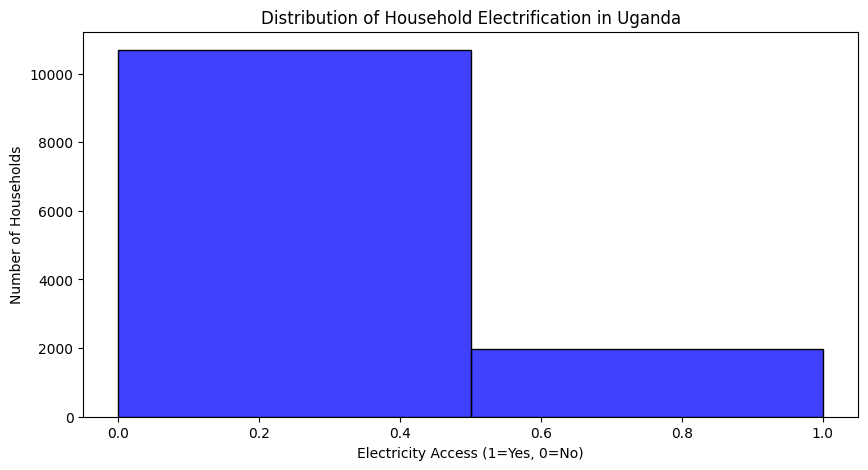

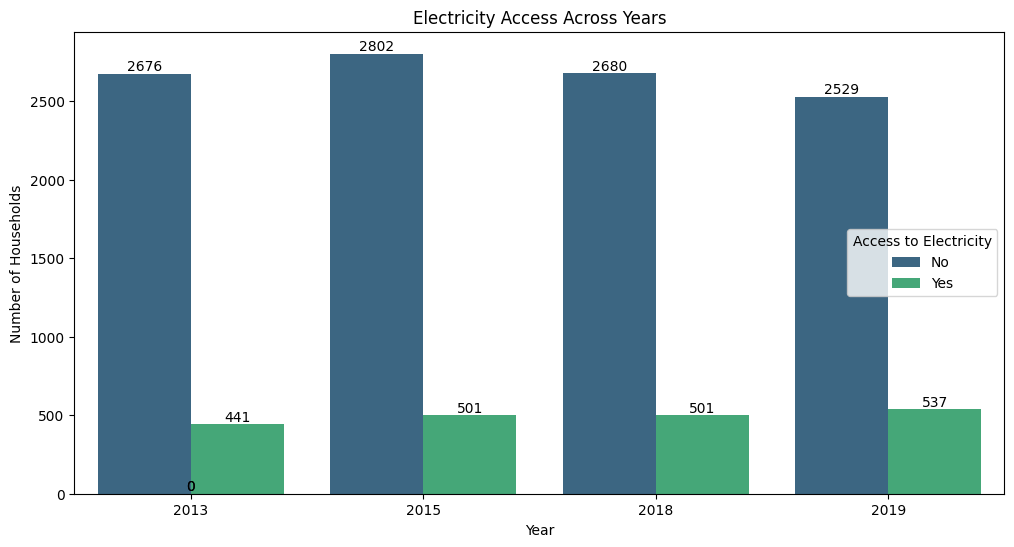

In [ ]:
#%% 1. Distribution of Electricity Access

plt.figure(figsize=(10, 5))
sns.histplot(unps_energy["access_to_electricity"], bins=2, kde=False, color="blue")
plt.xlabel("Electricity Access (1=Yes, 0=No)")
plt.ylabel("Number of Households")
plt.title("Distribution of Household Electrification in Uganda")
plt.show()

#Distribution of Electricity Access Across Years
if "year" in unps_energy.columns:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=unps_energy, x="year", hue="access_to_electricity", palette="viridis")
    plt.xlabel("Year")
    plt.ylabel("Number of Households")
    plt.title("Electricity Access Across Years")
    plt.legend(title="Access to Electricity", labels=["No", "Yes"])
    
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.show()
else:
    print("The 'year' column is not present in the dataset.")

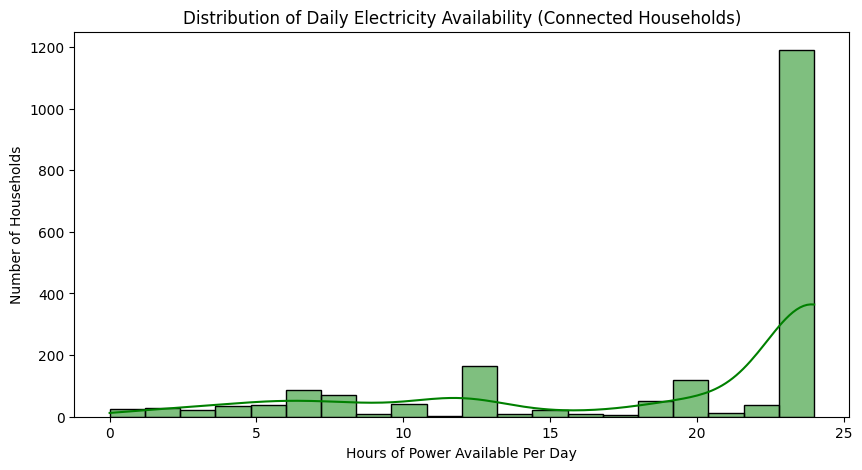

<ipython-input-11-7e0ed80aaaf6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=unps_energy[unps_energy["access_to_electricity"] == 1], x="year", y="hours_power", palette="Set3")


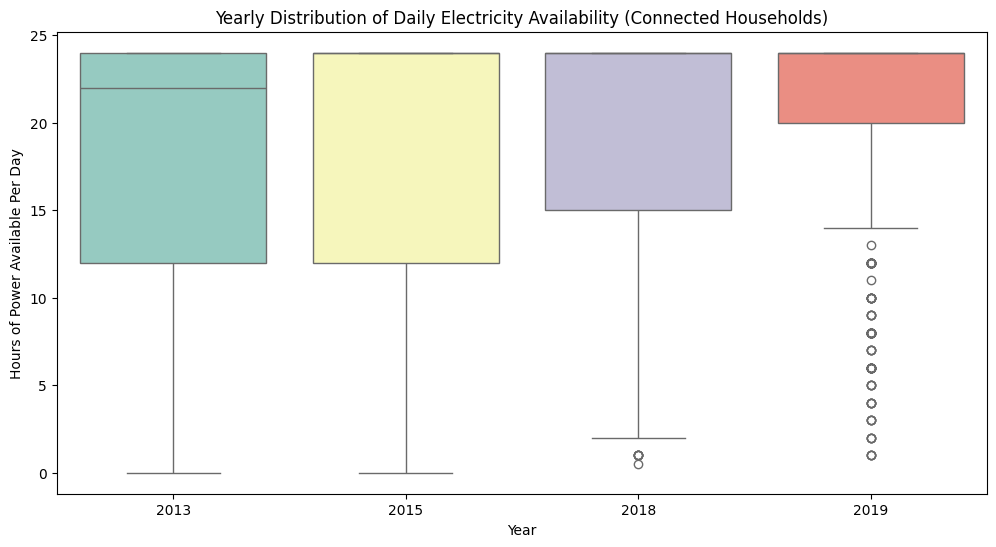

<ipython-input-11-7e0ed80aaaf6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_hours.index, y=avg_hours.values, palette="Blues_d")


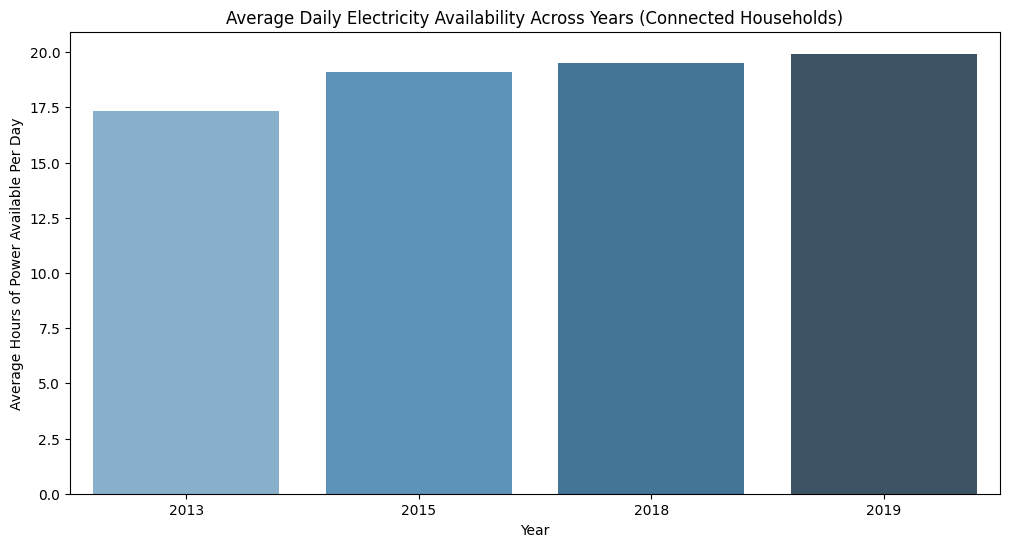

In [ ]:
#%% 2. Hours of Power Available Per Day (Only for Connected Households)

plt.figure(figsize=(10, 5))
sns.histplot(unps_energy[unps_energy["access_to_electricity"] == 1]["hours_power"], bins=20, kde=True, color="green")
plt.xlabel("Hours of Power Available Per Day")
plt.ylabel("Number of Households")
plt.title("Distribution of Daily Electricity Availability (Connected Households)")
plt.show()

# Distribution of Hours of Power Available Per Day Across Years
if "year" in unps_energy.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=unps_energy[unps_energy["access_to_electricity"] == 1], x="year", y="hours_power", palette="Set3")
    plt.xlabel("Year")
    plt.ylabel("Hours of Power Available Per Day")
    plt.title("Yearly Distribution of Daily Electricity Availability (Connected Households)")
    plt.show()
else:
    print("The 'year' column is not present in the dataset.")

if "year" in unps_energy.columns:
    plt.figure(figsize=(12, 6))
    avg_hours = unps_energy[unps_energy["access_to_electricity"] == 1].groupby("year")["hours_power"].mean()
    sns.barplot(x=avg_hours.index, y=avg_hours.values, palette="Blues_d")
    plt.xlabel("Year")
    plt.ylabel("Average Hours of Power Available Per Day")
    plt.title("Average Daily Electricity Availability Across Years (Connected Households)")
    plt.show()
else:
    print("The 'year' column is not present in the dataset.")

<ipython-input-12-1766efdfdd15>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=unps_energy, x="payment_method", palette="coolwarm", order=[1.0,2.0,3.0,4.0,5.0,8.0])


<Figure size 1000x500 with 0 Axes>

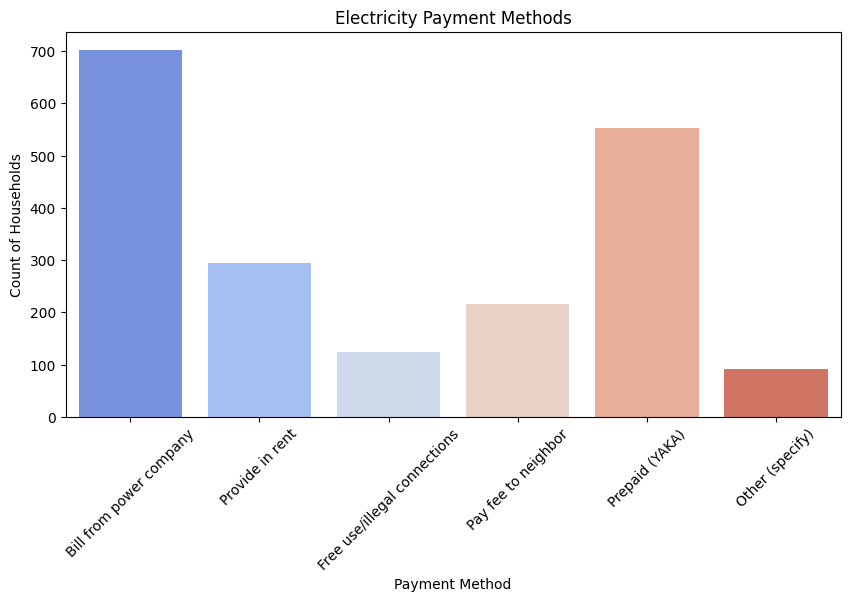

<ipython-input-12-1766efdfdd15>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-12-1766efdfdd15>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-12-1766efdfdd15>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-12-1766efdfdd15>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


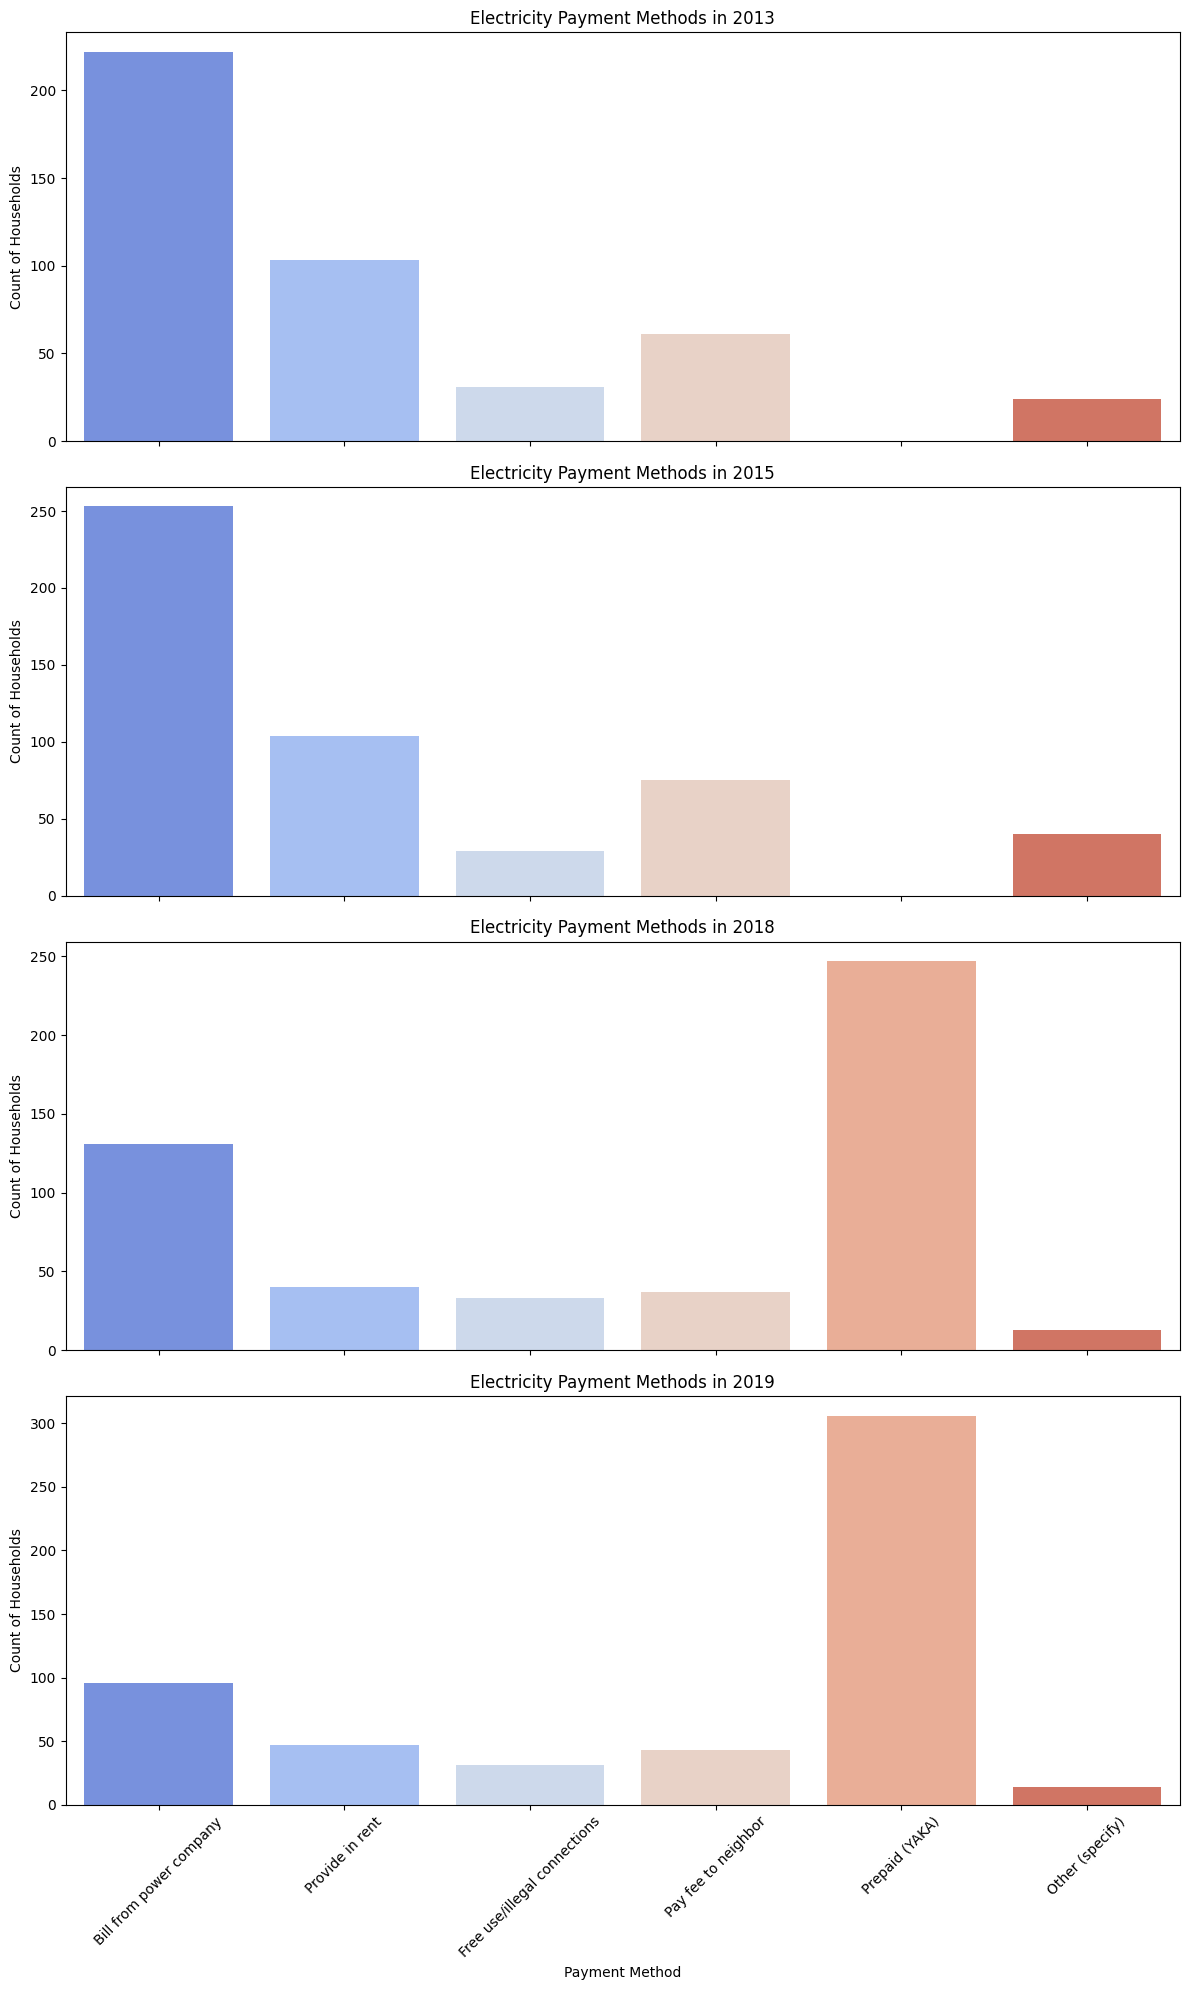

In [ ]:
#%% 3. How Do Households Pay for Electricity?

def recode_payment_method(x):
    if pd.isna(x):
        return np.nan
    val = str(x).strip().lower()
    if val in ['1', '1.0', 'bill from power company']:
        return 1
    elif val in ['2', '2.0', 'provide in rent']:
        return 2
    elif val in ['3', '3.0', 'free use/illegal connections']:
        return 3
    elif val in ['4', '4.0', 'pay fee to neighbor']:
        return 4
    elif val in ['5', '5.0', 'prepaid (yaka)']:
        return 5
    elif val in ['8', '8.0', 'other (specify)']:
        return 8
    else:
        return np.nan

unps_energy['payment_method'] = unps_energy['payment_method'].apply(recode_payment_method)

plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
sns.countplot(data=unps_energy, x="payment_method", palette="coolwarm", order=[1.0,2.0,3.0,4.0,5.0,8.0])
plt.xlabel("Payment Method")
plt.ylabel("Count of Households")
plt.title("Electricity Payment Methods")
plt.xticks(ticks=range(6), labels=[
    "Bill from power company", 
    "Provide in rent", 
    "Free use/illegal connections", 
    "Pay fee to neighbor", 
    "Prepaid (YAKA)", 
    "Other (specify)"
], rotation=45)
plt.show()

# Year-wise subplots for payment methods
if "year" in unps_energy.columns:
    unique_years = unps_energy["year"].dropna().unique()
    unique_years.sort()
    num_years = len(unique_years)
    fig, axes = plt.subplots(nrows=num_years, figsize=(12, 5 * num_years), sharex=True)

    for i, year in enumerate(unique_years):
        ax = axes[i] if num_years > 1 else axes
        sns.countplot(
            data=unps_energy[unps_energy["year"] == year],
            x="payment_method",
            palette="coolwarm",
            order=[1.0, 2.0, 3.0, 4.0, 5.0, 8.0],
            ax=ax
        )
        ax.set_title(f"Electricity Payment Methods in {int(year)}")
        ax.set_xlabel("Payment Method")
        ax.set_ylabel("Count of Households")
        ax.set_xticks(range(6))
        ax.set_xticklabels([
            "Bill from power company",
            "Provide in rent",
            "Free use/illegal connections",
            "Pay fee to neighbor",
            "Prepaid (YAKA)",
            "Other (specify)"
        ], rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("The 'year' column is not present in the dataset.")

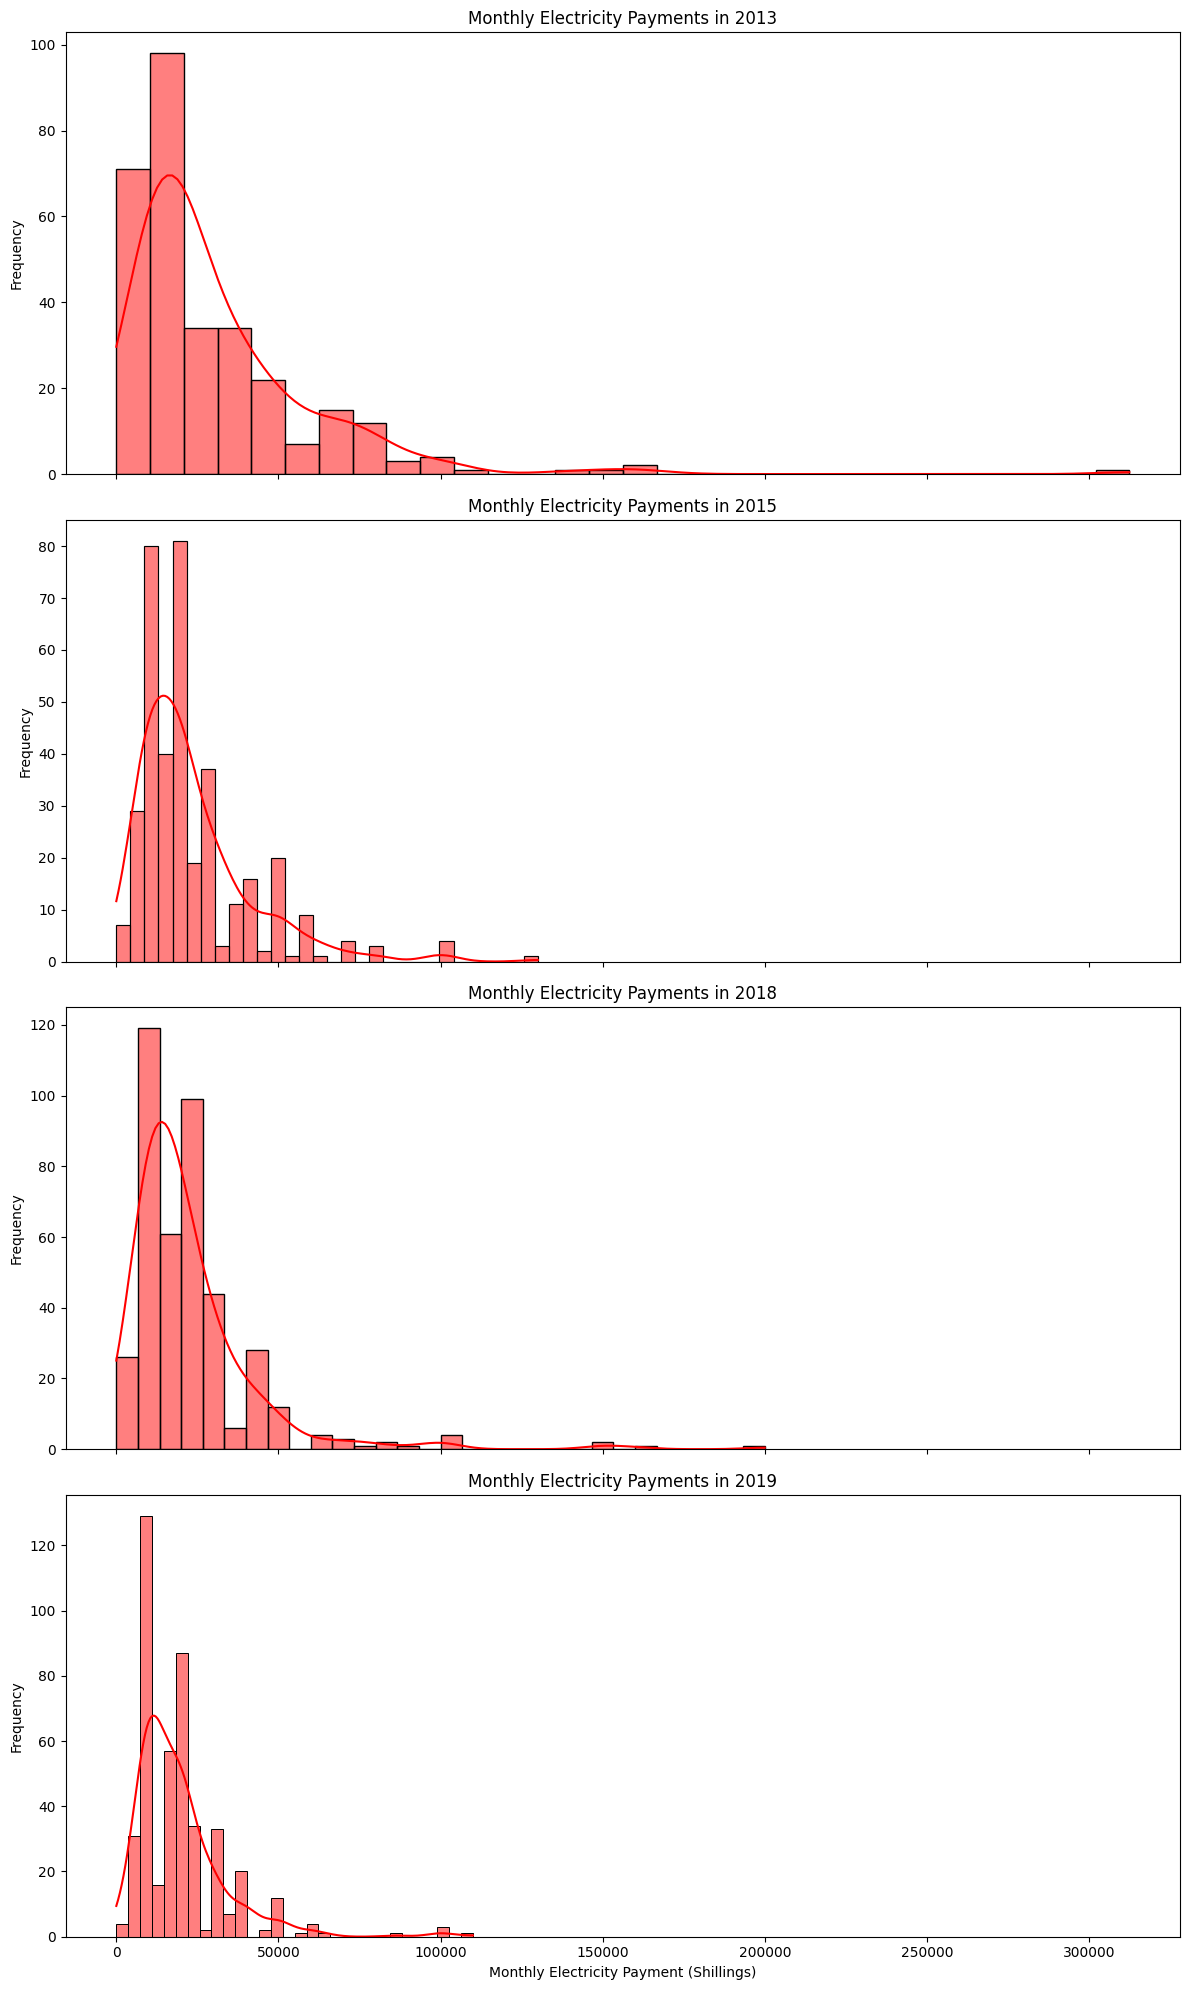

In [ ]:
#%% 4. Amount Paid for Electricity in the Last Month

# plt.figure(figsize=(10, 5))
# sns.histplot(unps_energy["monthly_payment"], bins=30, kde=True, color="red")
# plt.xlabel("Monthly Electricity Payment (Shillings)")
# plt.ylabel("Frequency")
# plt.title("Distribution of Monthly Electricity Payments")
# plt.show()

# Year-wise distribution of monthly payments
if "year" in unps_energy.columns:
    unique_years = unps_energy["year"].dropna().unique()
    unique_years.sort()
    num_years = len(unique_years)
    fig, axes = plt.subplots(nrows=num_years, figsize=(12, 5 * num_years), sharex=True)

    for i, year in enumerate(unique_years):
        ax = axes[i] if num_years > 1 else axes
        sns.histplot(
            unps_energy[unps_energy["year"] == year]["monthly_payment"],
            bins=30, kde=True, color="red", ax=ax
        )
        ax.set_title(f"Monthly Electricity Payments in {int(year)}")
        ax.set_xlabel("Monthly Electricity Payment (Shillings)")
        ax.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()
else:
    print("The 'year' column is not present in the dataset.")

<ipython-input-14-8eea4b23bd33>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x="reason_no_electricity", palette="magma")


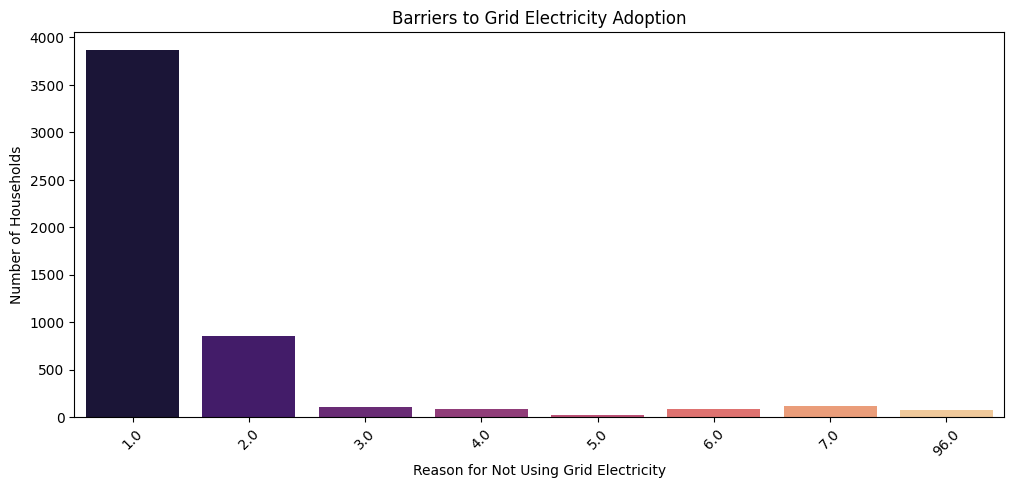

<ipython-input-14-8eea4b23bd33>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-14-8eea4b23bd33>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


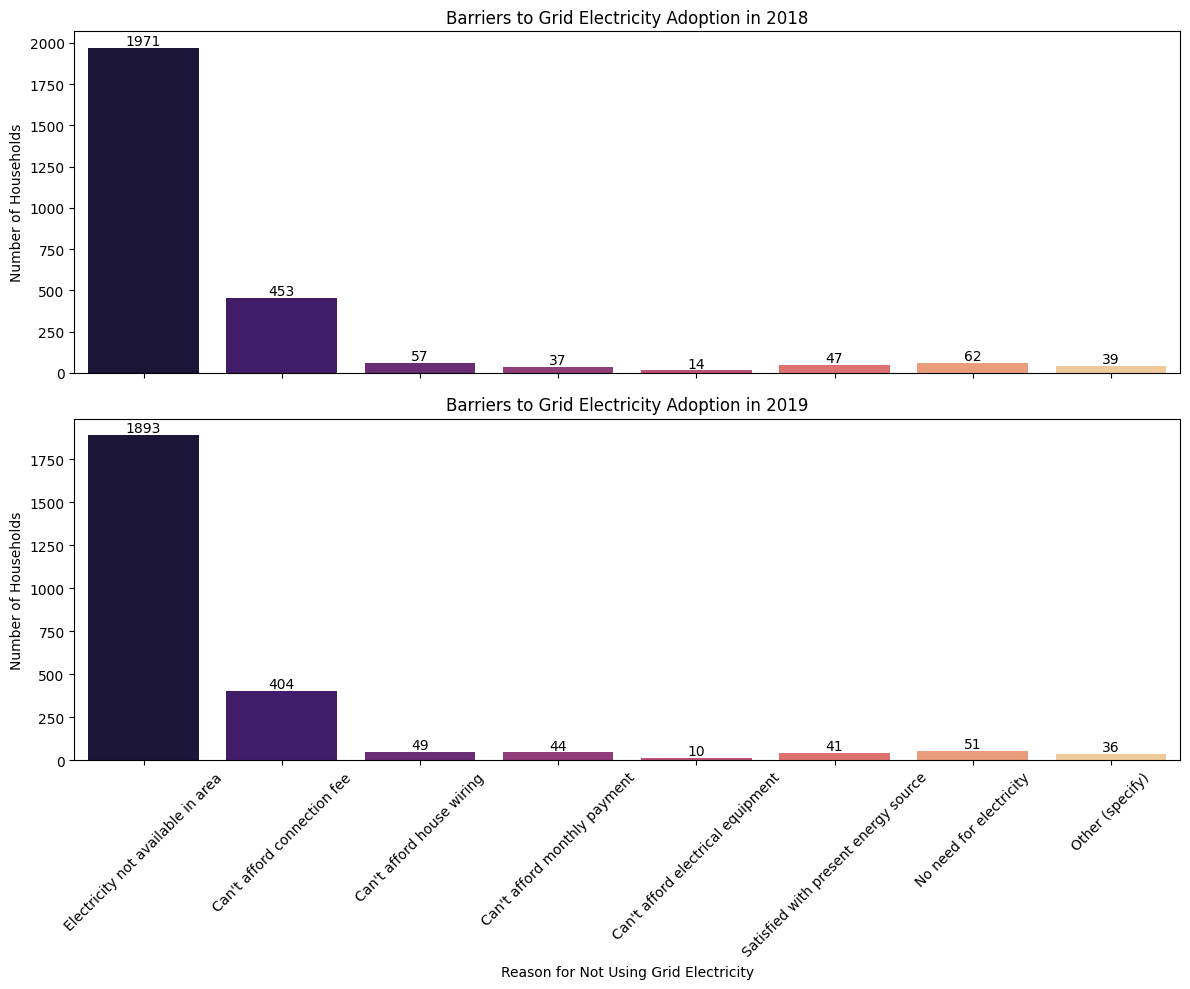

In [ ]:
#%% 5. Reasons for Not Using Grid Electricity

# Filter data for years 2018 and 2019
filtered_data = unps_energy[unps_energy["year"].isin([2018, 2019])]

plt.figure(figsize=(12, 5))
sns.countplot(data=filtered_data, x="reason_no_electricity", palette="magma")
plt.xlabel("Reason for Not Using Grid Electricity")
plt.ylabel("Number of Households")
plt.title("Barriers to Grid Electricity Adoption")
plt.xticks(rotation=45)
plt.show()
#sublpots for each year
fig, axes = plt.subplots(nrows=2, figsize=(12, 10), sharex=True)

reason_labels = [
    "Electricity not available in area",
    "Can't afford connection fee",
    "Can't afford house wiring",
    "Can't afford monthly payment",
    "Can't afford electrical equipment",
    "Satisfied with present energy source",
    "No need for electricity",
    "Other (specify)"
]

for i, year in enumerate([2018, 2019]):
    ax = axes[i]
    sns.countplot(
        data=filtered_data[filtered_data["year"] == year],
        x="reason_no_electricity",
        palette="magma",
        order=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 96.0],
        ax=ax
    )
    ax.set_title(f"Barriers to Grid Electricity Adoption in {year}")
    ax.set_xlabel("Reason for Not Using Grid Electricity")
    ax.set_ylabel("Number of Households")
    ax.set_xticks(range(len(reason_labels)))
    ax.set_xticklabels(reason_labels, rotation=45)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

plt.tight_layout()
plt.show()
##################################################################################################################################

In [ ]:
#%%

# Display sample data
print("UNPS Fuel Data Sample:\n", unps_fuel.head())
unps_fuel.rename(columns={
    's10q13': 'fuel_id',
    's10q14': 'uses_fuel',           # YES/NO overall usage
    's10q15a': 'use_for_cooking',
    's10q15b': 'use_for_lighting',
    's10q15c': 'use_for_heating',
    's10q16': 'fuel_source',
    's10q17a': 'fuel_payment_amount',
    's10q17b': 'fuel_quantity',
    's10q17c': 'fuel_unit',
    'hhid': 'household_id'
}, inplace=True)
# Basic EDA for statistics
print("Dataset Information:")
print(unps_fuel.info())

print("\nSummary Statistics:")
print(unps_fuel.describe(include='all'))

print("\nMissing Values:")
print(unps_fuel.isnull().sum())

UNPS Fuel Data Sample:
            hhid s10q13 s10q14 s10q15a s10q15b s10q15c s10q16  s10q17a  \
0  H00101-04-01      1      2     NaN     NaN     NaN    NaN      NaN   
1  H00101-04-01      2      2     NaN     NaN     NaN    NaN      NaN   
2  H00101-04-01      3      2     NaN     NaN     NaN    NaN      NaN   
3  H00101-04-01      4      2     NaN     NaN     NaN    NaN      NaN   
4  H00101-04-01      5      2     NaN     NaN     NaN    NaN      NaN   

   s10q17b s10q17c  year  
0      NaN     NaN  2013  
1      NaN     NaN  2013  
2      NaN     NaN  2013  
3      NaN     NaN  2013  
4      NaN     NaN  2013  
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105444 entries, 0 to 105443
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   household_id         105444 non-null  object 
 1   fuel_id              105444 non-null  object 
 2   uses_fuel            104119 non-nu


Top 10 Most Common Fuel Types:
fuel_id
Kerosene        12678
Firewood        12677
Dung            12677
Crop Residue    12677
Electricity     12677
LPG             12676
Charcoal        12676
Solar           12676
Other            4030
Name: count, dtype: int64


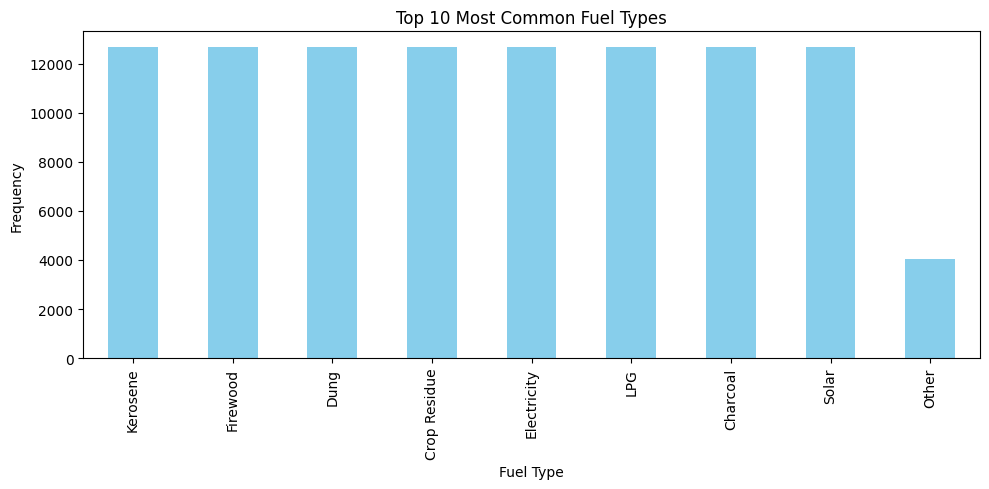

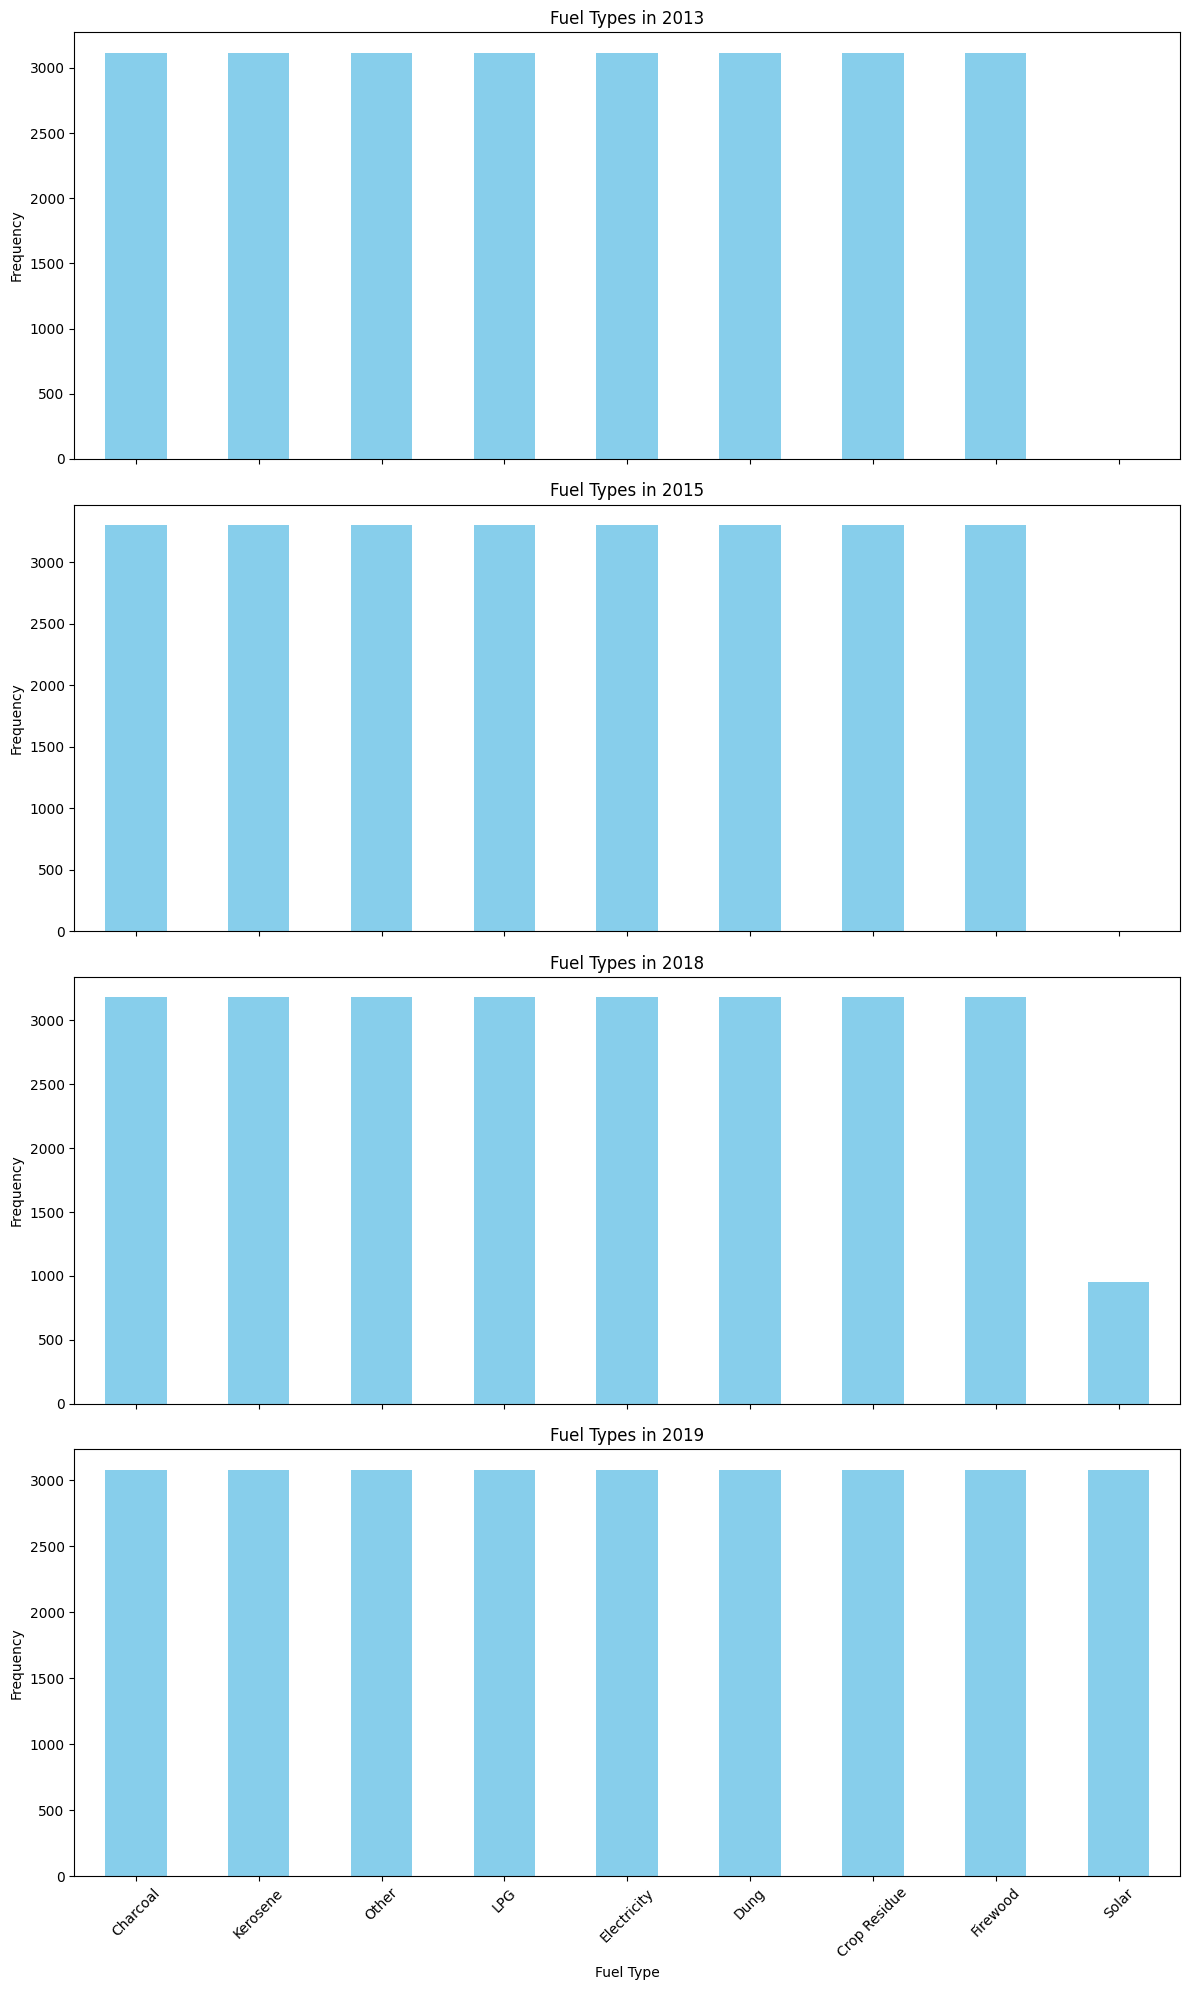

In [ ]:
# %%

# Recoding fuel_id 
def recode_fuel_id(x):
    mapping = {
        '1': "Firewood",
        '2': "Dung",
        '3': "Crop Residue",
        '4': "Kerosene",
        '5': "LPG",
        '6': "Charcoal",
        '7': "Solar",
        '8': "Electricity",
        '9': "Other",
        'Firewood': "Firewood",
        'Kerosene': "Kerosene",
        'Dung': "Dung",
        'Solar': "Solar",
        'lpg': "LPG",
        'Charcoal': "Charcoal",
        'Crop Residue': "Crop Residue",
        'Electricity': "Electricity"
    }
    return mapping.get(str(x).strip(), "Unknown")

unps_fuel['fuel_id'] = unps_fuel['fuel_id'].apply(recode_fuel_id)

# Display the top 10 most common fuel types
print("\nTop 10 Most Common Fuel Types:")
print(unps_fuel['fuel_id'].value_counts().head(10))

# Plot the top 10 most common fuel types
plt.figure(figsize=(10, 5))
unps_fuel['fuel_id'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Year-wise subplots for fuel types
if "year" in unps_fuel.columns:
    unique_years = unps_fuel["year"].dropna().unique()
    unique_years.sort()
    num_years = len(unique_years)
    fig, axes = plt.subplots(nrows=num_years, figsize=(12, 5 * num_years), sharex=True)

    for i, year in enumerate(unique_years):
        ax = axes[i] if num_years > 1 else axes
        fuel_counts = unps_fuel[unps_fuel["year"] == year]["fuel_id"].value_counts()
        fuel_counts.plot(kind='bar', color='skyblue', ax=ax)
        ax.set_title(f"Fuel Types in {int(year)}")
        ax.set_xlabel("Fuel Type")
        ax.set_ylabel("Frequency")
        ax.set_xticks(range(len(fuel_counts.index)))
        ax.set_xticklabels(fuel_counts.index, rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("The 'year' column is not present in the dataset.")


use_for_cooking value counts:
use_for_cooking
Yes    16286
No      9757
Name: count, dtype: int64

use_for_lighting value counts:
use_for_lighting
No     15593
Yes    12253
Name: count, dtype: int64

use_for_heating value counts:
use_for_heating
No     24725
Yes     1316
Name: count, dtype: int64


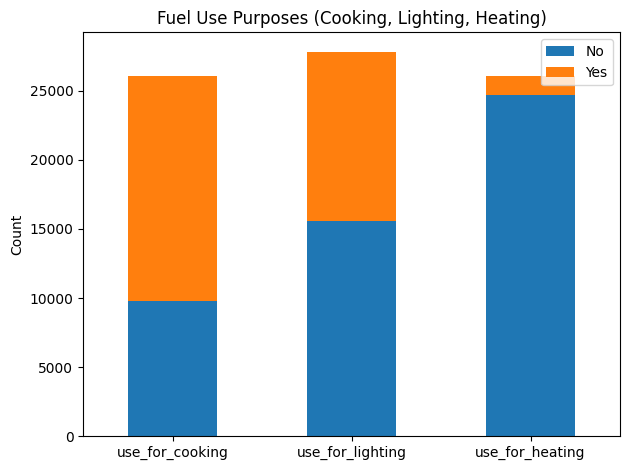

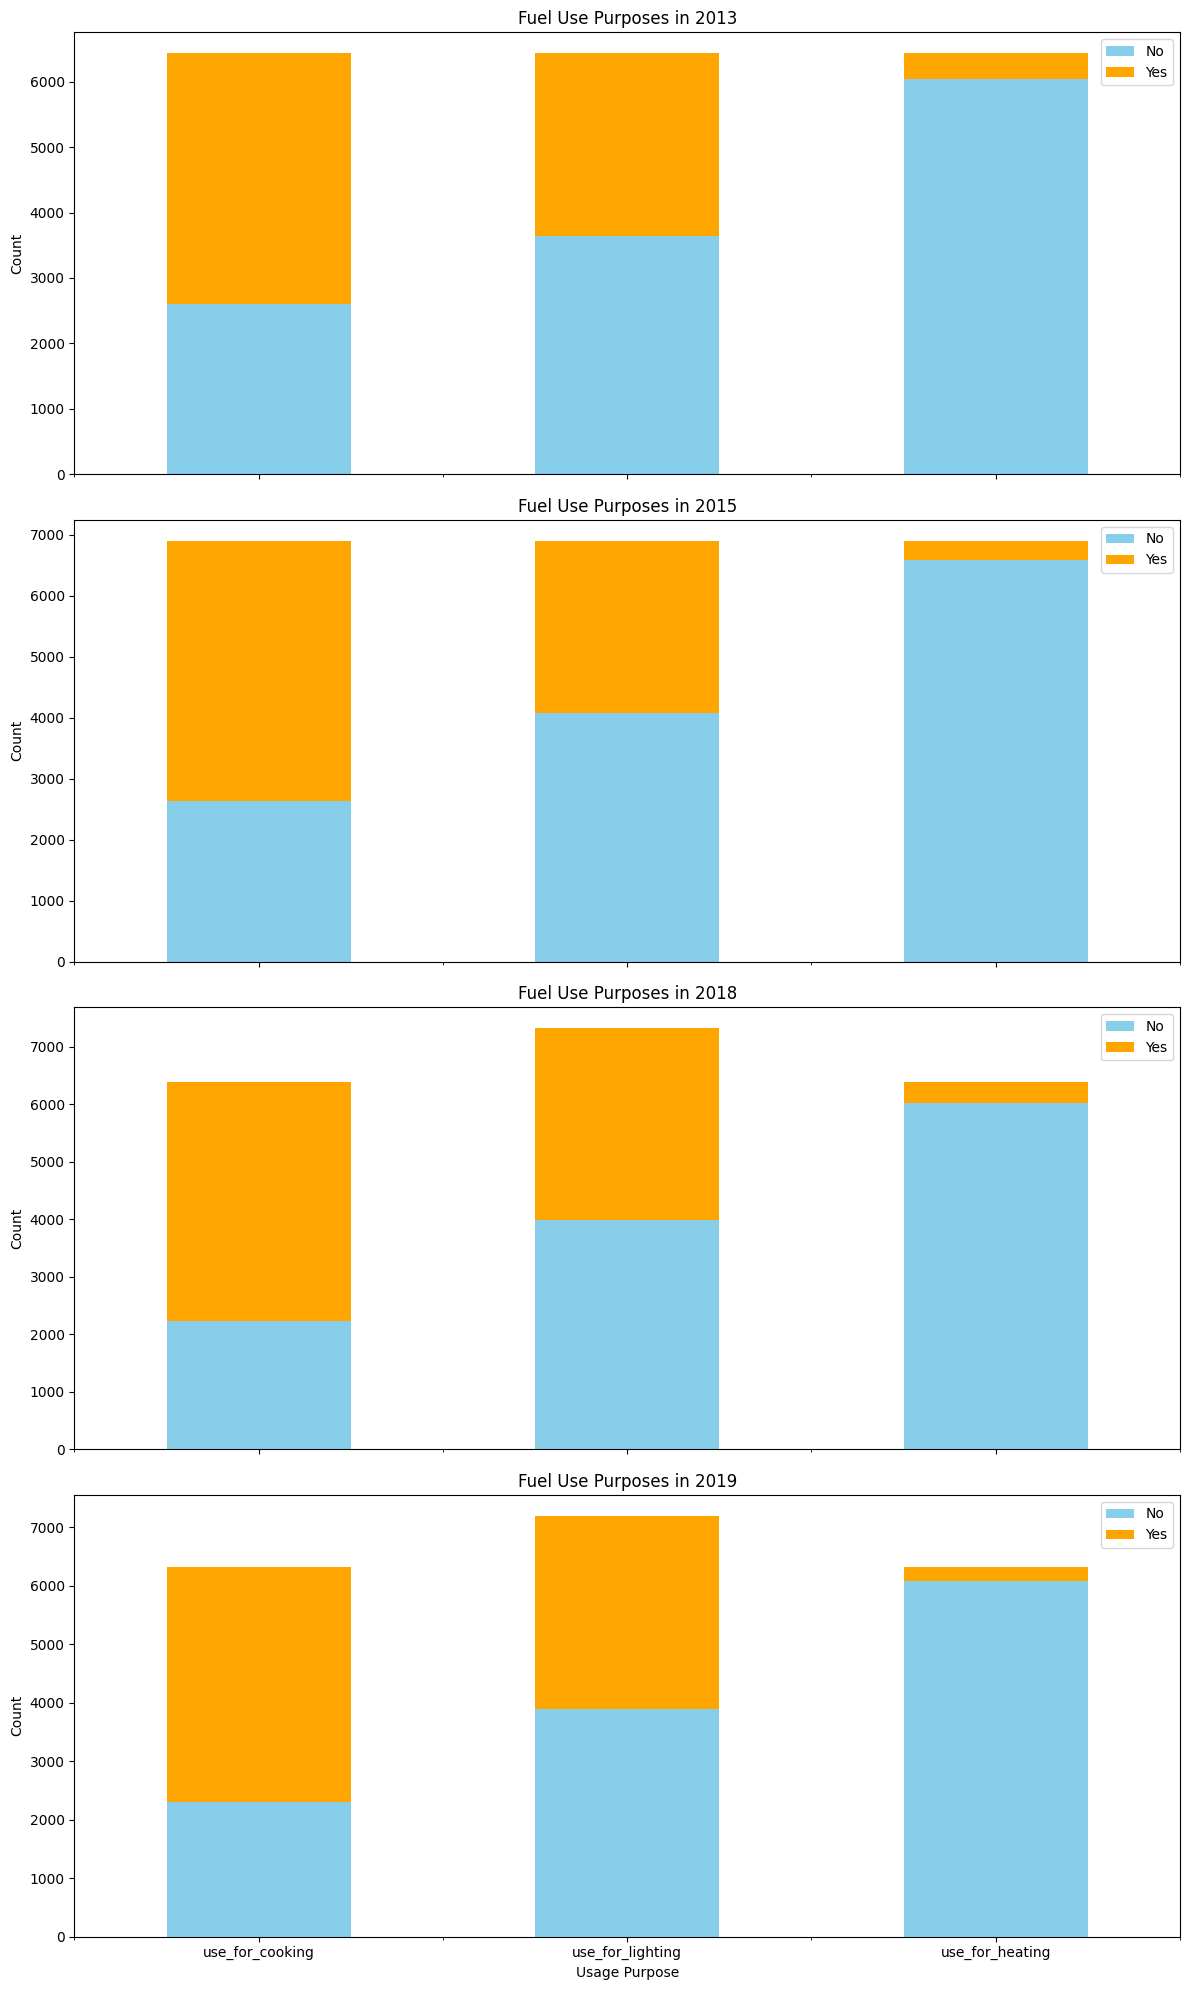

In [ ]:
# %% Use of fuels by purpose

# Map values for better readability
purpose_cols = ['use_for_cooking', 'use_for_lighting', 'use_for_heating']
value_mapping = {
    1.0: "Yes",
    "1.0": "Yes",
    1: "Yes",
    2.0: "No",
    "2.0": "No",
    2: "No",
    "Yes": "Yes",
    "No": "No"
}
for col in purpose_cols:
    unps_fuel[col] = unps_fuel[col].map(value_mapping)
    print(f"\n{col} value counts:")
    print(unps_fuel[col].value_counts())

# Stacked bar: usage purpose
usage_df = unps_fuel[purpose_cols].apply(pd.Series.value_counts).T
usage_df.plot(kind='bar', stacked=True)
plt.title("Fuel Use Purposes (Cooking, Lighting, Heating)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

if "year" in unps_fuel.columns:
    unique_years = sorted(unps_fuel["year"].dropna().unique())
    num_years = len(unique_years)
    fig, axes = plt.subplots(nrows=num_years, figsize=(12, 5 * num_years), sharex=True)
    
    for i, year in enumerate(unique_years):
        ax = axes[i] if num_years > 1 else axes
        # subset the data for the given year
        year_data = unps_fuel[unps_fuel["year"] == year]
        # Create a stacked bar using the mapped purpose columns
        usage_df = year_data[purpose_cols].apply(pd.Series.value_counts).T
        usage_df.plot(kind='bar', stacked=True, ax=ax, color=["skyblue", "orange"])
        ax.set_title(f"Fuel Use Purposes in {int(year)}")
        ax.set_xlabel("Usage Purpose")
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.show()
else:
    print("The 'year' column is not present in the dataset.")


Top 10 Fuel IDs by Avg Monthly Payment:
 fuel_id
LPG             51845.108696
Charcoal        25080.992533
Firewood        18884.249504
Kerosene         3334.526383
Other            2282.079213
Crop Residue        0.000000
Dung                     NaN
Electricity              NaN
Solar                    NaN
Name: fuel_payment_amount, dtype: float64


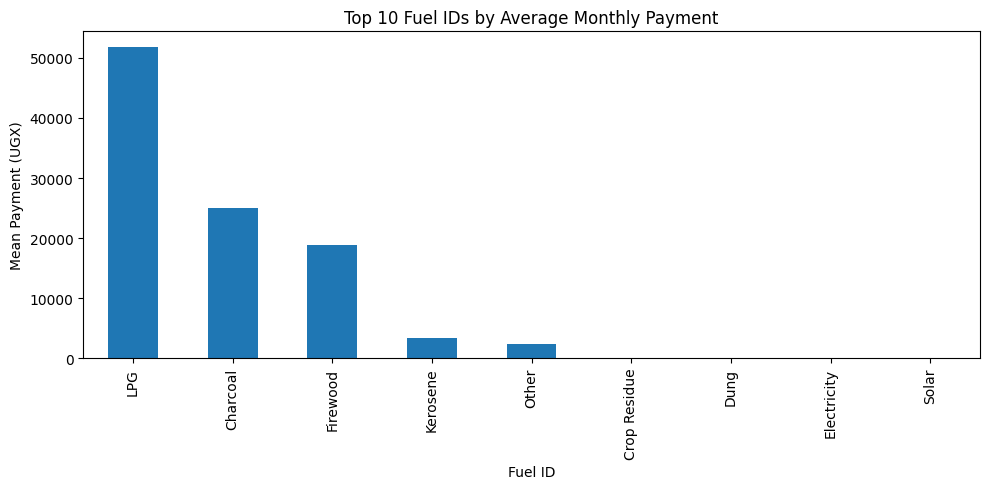

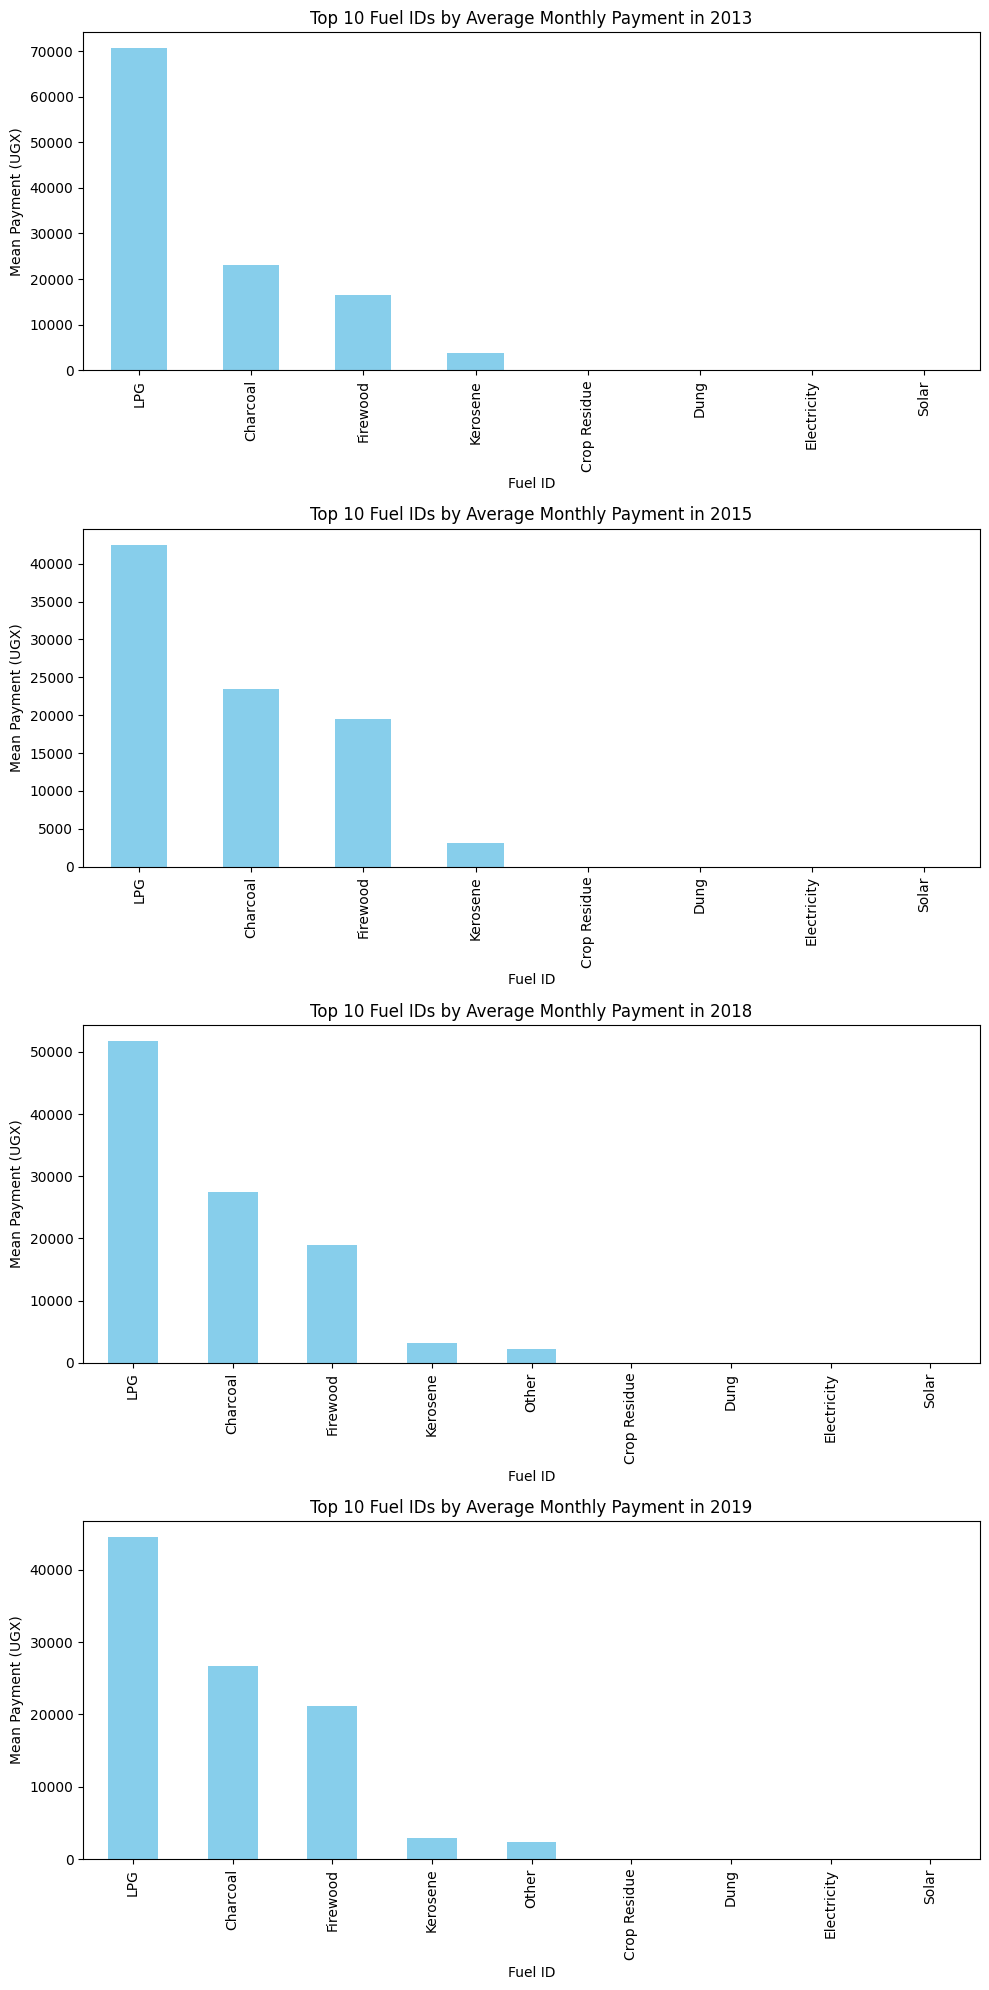

In [ ]:
#%%

avg_payment = unps_fuel.groupby('fuel_id')['fuel_payment_amount'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Fuel IDs by Avg Monthly Payment:\n", avg_payment)

plt.figure(figsize=(10, 5))
avg_payment.plot(kind='bar')
plt.title("Top 10 Fuel IDs by Average Monthly Payment")
plt.xlabel("Fuel ID")
plt.ylabel("Mean Payment (UGX)")
plt.tight_layout()
plt.show()

if "year" in unps_fuel.columns:
    unique_years = sorted(unps_fuel["year"].dropna().unique())
    num_years = len(unique_years)
    fig, axes = plt.subplots(nrows=num_years, figsize=(10, 5 * num_years))
    
    for i, year in enumerate(unique_years):
        ax = axes[i] if num_years > 1 else axes
        # Filter the data for the given year and compute the average monthly payment per fuel_id
        avg_payment_year = (unps_fuel[unps_fuel["year"] == year]
                            .groupby('fuel_id')['fuel_payment_amount']
                            .mean()
                            .sort_values(ascending=False)
                            .head(10))
        avg_payment_year.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f"Top 10 Fuel IDs by Average Monthly Payment in {int(year)}")
        ax.set_xlabel("Fuel ID")
        ax.set_ylabel("Mean Payment (UGX)")
    
    plt.tight_layout()
    plt.show()
else:
    print("The 'year' column is not present in the dataset.")


Fuel Source Distribution:
fuel_source
6.0                               5617
1.0                               4584
2.0                               3149
5.0                               2760
Gather / collect from village     2035
Purchase from shop                1376
Purchase from marketplace         1181
Gather / collect from own land     952
3.0                                757
Purchase from public utility       425
4.0                                118
Purchase on the black market        73
Name: count, dtype: int64


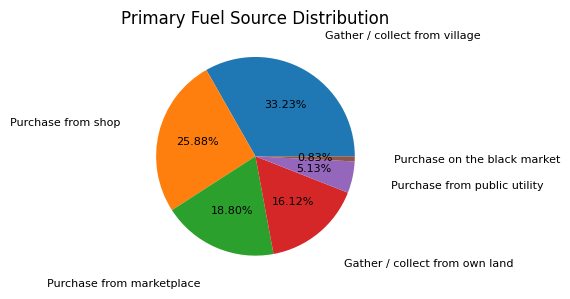

In [ ]:
# %%

print("\nFuel Source Distribution:")
print(unps_fuel['fuel_source'].value_counts())
source_mapping = {
    # map numeric values and their string versions
    1: "Purchase from shop",
    "1": "Purchase from shop",
    1.0: "Purchase from shop",
    "1.0": "Purchase from shop",
    
    2: "Purchase from marketplace",
    "2": "Purchase from marketplace",
    2.0: "Purchase from marketplace",
    "2.0": "Purchase from marketplace",
    
    3: "Purchase from public utility",
    "3": "Purchase from public utility",
    3.0: "Purchase from public utility",
    "3.0": "Purchase from public utility",
    
    4: "Purchase on the black market",
    "4": "Purchase on the black market",
    4.0: "Purchase on the black market",
    "4.0": "Purchase on the black market",
    
    5: "Gather / collect from own land",
    "5": "Gather / collect from own land",
    5.0: "Gather / collect from own land",
    "5.0": "Gather / collect from own land",
    
    6: "Gather / collect from village",
    "6": "Gather / collect from village",
    6.0: "Gather / collect from village",
    "6.0": "Gather / collect from village",
    
    
    "Purchase from shop": "Purchase from shop",
    "Purchase from marketplace": "Purchase from marketplace",
    "Purchase from public utility": "Purchase from public utility",
    "Purchase on the black market": "Purchase on the black market",
    "Gather / collect from own land": "Gather / collect from own land",
    "Gather / collect from village": "Gather / collect from village",
    "a": "Other"
}
unps_fuel['fuel_source_mapped'] = unps_fuel['fuel_source'].map(source_mapping)
plt.figure(figsize=(6, 6))
unps_fuel['fuel_source_mapped'].value_counts().plot.pie(
    autopct='%1.2f%%', 
    labeldistance=1.4, 
    pctdistance=0.6, 
    textprops={'fontsize': 8}
)
plt.title("Primary Fuel Source Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

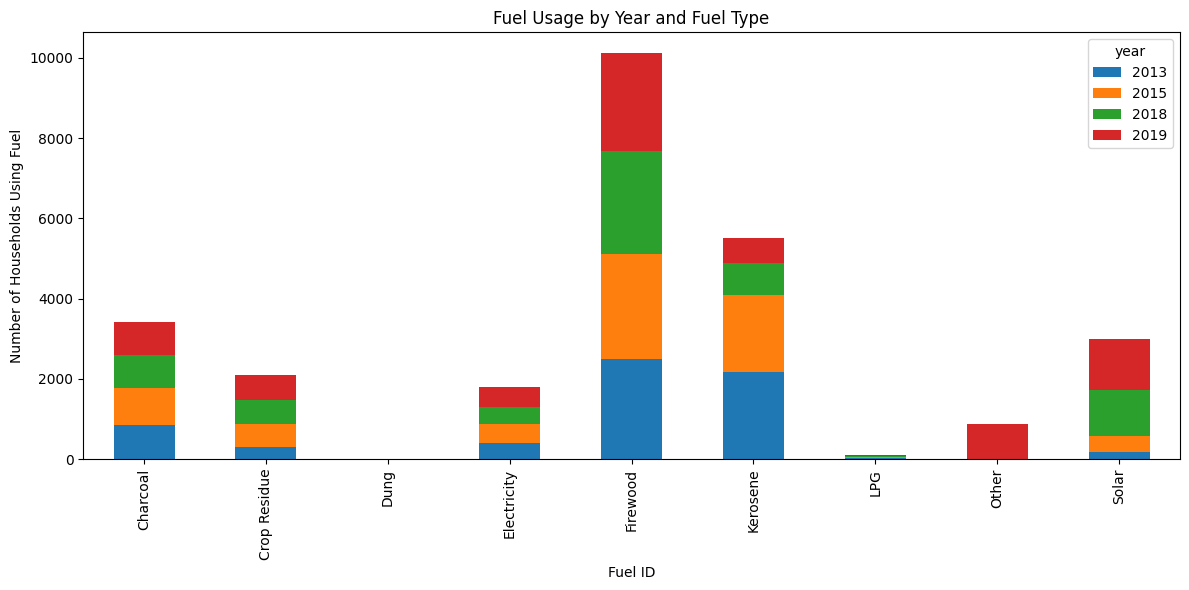

In [ ]:
# %%

mapping = {
    "Yes": 1,
    "1": 1,
    "1.0": 1,
    "No": 0,
    "2": 0,
    "2.0": 0
}
unps_fuel['uses_fuel_numeric'] = unps_fuel['uses_fuel'].map(mapping)

usage_by_year = unps_fuel.groupby(['year', 'fuel_id'])['uses_fuel_numeric'] \
                           .sum().unstack(fill_value=0)

usage_by_year.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Fuel Usage by Year and Fuel Type")
plt.xlabel("Fuel ID")
plt.ylabel("Number of Households Using Fuel")
plt.tight_layout()
plt.show()